In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../Data/cardio_train.csv", delimiter=';')


C:\Users\Johan\AppData\Local\Temp\ipykernel_1320\407050302.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df = df[(df['weight'] >= 40) & (df['weight'] <= 180)]

df = df[(df['height'] >= 140) & (df['height'] <= 215)]

df = df[(df['age'] >= 10965)]

df = df[(df['ap_hi'] >= 90) & (df['ap_hi'] <= 250) & (df['ap_lo'] >= 60) & (df['ap_lo'] <= 150)]

df = df[(df['ap_hi'] > 0) & (df['ap_lo'] > 0)]

print(df.describe())

                 id           age        gender        height        weight  \
count  68327.000000  68327.000000  68327.000000  68327.000000  68327.000000   
mean   49972.593997  19466.536728      1.349262    164.478215     74.162873   
std    28849.148609   2465.752225      0.476740      7.793771     14.227153   
min        0.000000  14275.000000      1.000000    140.000000     40.000000   
25%    25006.500000  17663.000000      1.000000    159.000000     65.000000   
50%    50013.000000  19702.000000      1.000000    165.000000     72.000000   
75%    74869.500000  21324.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    207.000000    180.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  68327.000000  68327.000000  68327.000000  68327.000000  68327.000000   
mean     126.734585     81.401686      1.365024      1.225899      0.088018   
std       16.605339      9.398080      0.679322    

In [5]:
count_cardio = df['cardio'].value_counts()

print(f'positive = {count_cardio[0]} \nnegative = {count_cardio[1]}')


count_cholesterol = df['cholesterol'].value_counts()
print(f'normal cholesterol = {count_cholesterol[1]} \nabove normal cholesterol = {count_cholesterol[2]} \nwell above normal cholesterol = {count_cholesterol[3]}')

mean_smokers = df['smoke'].mean()
print(f'Average amount of smokers = {mean_smokers:.2f}')



positive = 34473 
negative = 33854
normal cholesterol = 51233 
above normal cholesterol = 9247 
well above normal cholesterol = 7847
Average amount of smokers = 0.09


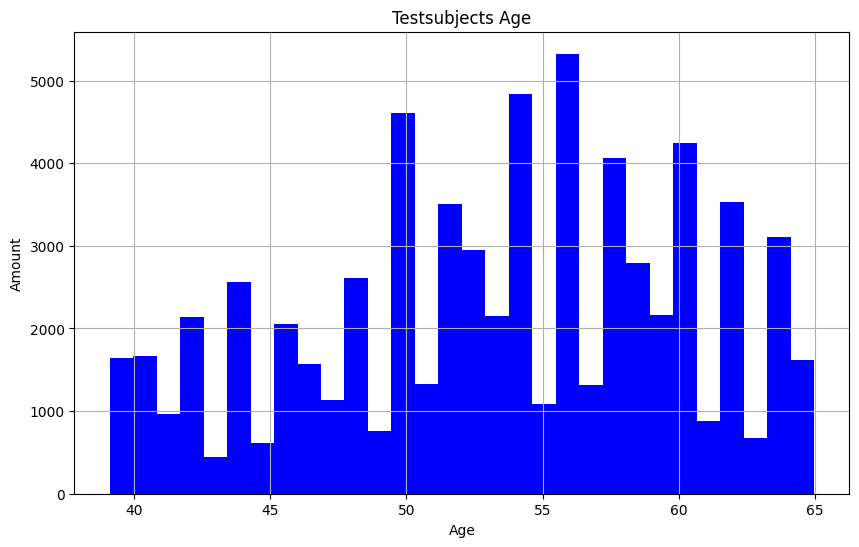

In [6]:
df["age_years"] = df["age"]/365
plt.figure(figsize=(10, 6))
plt.hist(df['age_years'], bins=30, color='b')
plt.title('Testsubjects Age')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

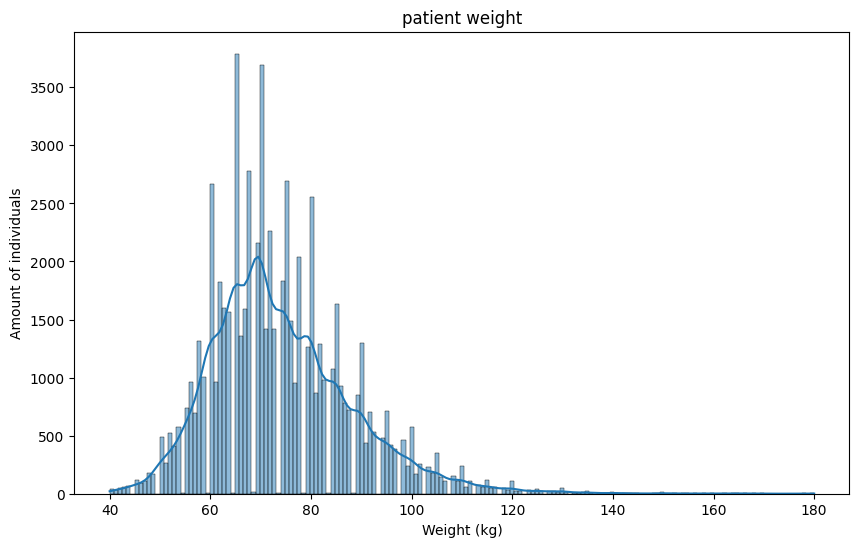

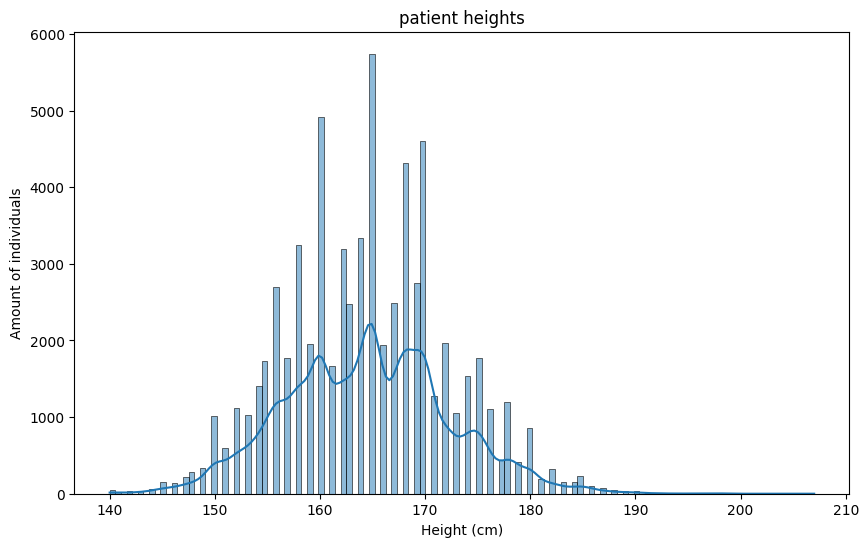

In [7]:

plt.figure(figsize=(10, 6))
sns.histplot(df['weight'], kde=True)
plt.title('patient weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Amount of individuals')

plt.figure(figsize=(10, 6))
sns.histplot(df['height'], kde=True)
plt.title('patient heights')
plt.xlabel('Height (cm)')
plt.ylabel('Amount of individuals')
plt.show()


In [8]:
gender_cardio_crosstab = pd.crosstab(df['gender'], df['cardio'], rownames=['Gender'], colnames=['Cardio Disease'], margins=True)
gender_cardio_crosstab.index = ['Women', 'Men', 'Total']  
gender_cardio_crosstab.columns = ['No Cardio Disease', 'Has Cardio Disease', 'Total']

print(gender_cardio_crosstab)

       No Cardio Disease  Has Cardio Disease  Total
Women              22545               21918  44463
Men                11928               11936  23864
Total              34473               33854  68327


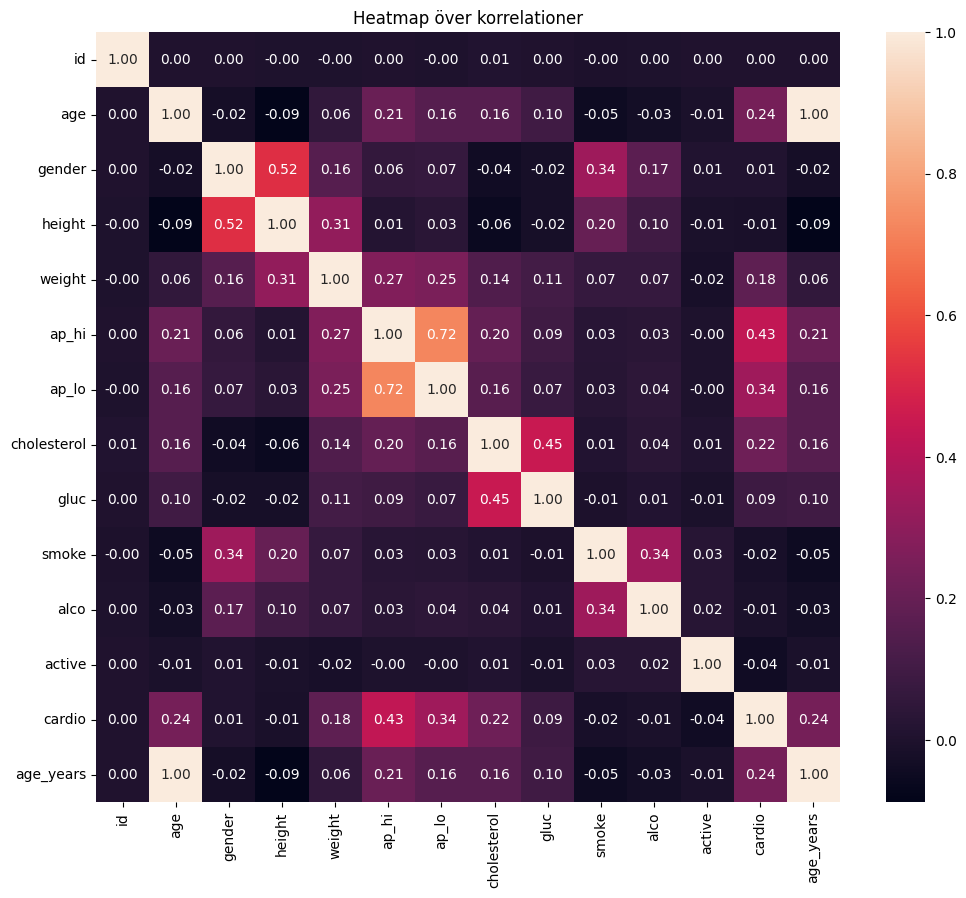

In [9]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))  
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cbar=True)
plt.title('Heatmap över korrelationer')  
plt.show()


In [13]:
# Beräkna BMI korrekt och skapa kolumnen
df['BMI'] = df['weight'] / (df['height'] / 100) ** 2

# Filtrera nu på den korrekt skapade 'BMI'-kolumnen
df = df[(df['BMI'] >= 15) & (df['BMI'] <= 40)]

# Fortsätt med att skapa BMI-kategorier
bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese Class I', 'Obese Class II', 'Obese Class III']
df['BMI_category'] = pd.cut(df['BMI'], bins=bins, labels=labels)

# Skapa dummy-variabler för BMI-kategorier och lägg till i DataFrame
bmi_dummies = pd.get_dummies(df['BMI_category'])
df = pd.concat([df, bmi_dummies], axis=1)

# Kontrollera korrelationerna
print(df.corr()['cardio'])


ValueError: could not convert string to float: 'Normal'